# Time Series

In [1]:
import pandas as pd

In [54]:
stocks = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [23]:
stocks.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [3]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


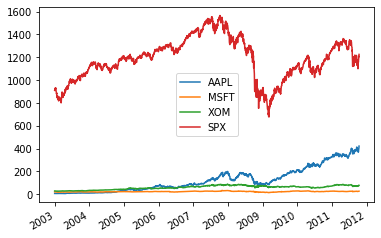

In [4]:
stocks.plot()

In [5]:
del stocks['SPX']

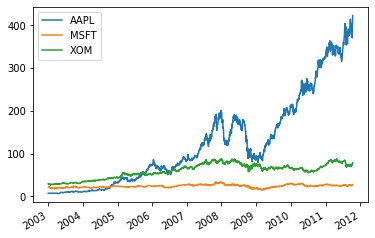

In [6]:
stocks.plot()

## 2. Create a single time stamp
- Many formats acceptible!

In [7]:
pd.to_datetime('June 2nd 2020')

Timestamp('2020-06-02 00:00:00')

In [8]:
ts = ['June 2nd 2020', '06/02/2020', 'Tuesday 2nd June 2020']

In [9]:
pd.to_datetime(ts)

DatetimeIndex(['2020-06-02', '2020-06-02', '2020-06-02'], dtype='datetime64[ns]', freq=None)

## 3. Create a series of time stamps
- Set your own frequency

In [15]:
pd.date_range('05/02/2020', '06/02/2020', freq='2D') # freq can do any frequency (e.g. 2D 5min or W-MON)

DatetimeIndex(['2020-05-02', '2020-05-04', '2020-05-06', '2020-05-08',
               '2020-05-10', '2020-05-12', '2020-05-14', '2020-05-16',
               '2020-05-18', '2020-05-20', '2020-05-22', '2020-05-24',
               '2020-05-26', '2020-05-28', '2020-05-30', '2020-06-01'],
              dtype='datetime64[ns]', freq='2D')

In [20]:
pd.date_range('05/02/2020', '06/02/2020') #convert time zones (verpasst)

DatetimeIndex(['2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02'],
              dtype='datetime64[ns]', freq='D')

## 4. Access time fields

In [16]:
stocks.index[:3]

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06'], dtype='datetime64[ns]', freq=None)

In [19]:
stocks.index.year[:3] #gives out integers

Int64Index([2003, 2003, 2003], dtype='int64')

In [21]:
stocks.index.month[:3]

Int64Index([1, 1, 1], dtype='int64')

In [32]:
stocks.index.weekday[:3]

Int64Index([3, 4, 0], dtype='int64')

In [24]:
stocks.index[0]

Timestamp('2003-01-02 00:00:00')

In [33]:
stocks.index.day_name()[:3]

Index(['Thursday', 'Friday', 'Monday'], dtype='object')

In [36]:
stocks.loc[stocks.index.year == 2003] #filtering with boolean masks

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2003-12-24,10.20,21.44,33.73
2003-12-26,10.39,21.57,33.91
2003-12-29,10.57,21.77,34.36
2003-12-30,10.64,21.82,34.45


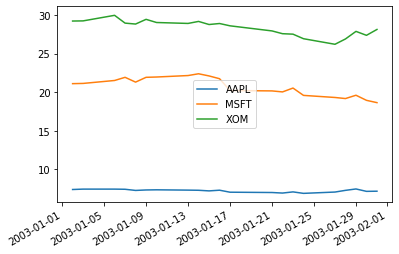

In [39]:
stocks.loc[(stocks.index.year == 2003) & (stocks.index.month == 1)].plot() #filtering for two aspects

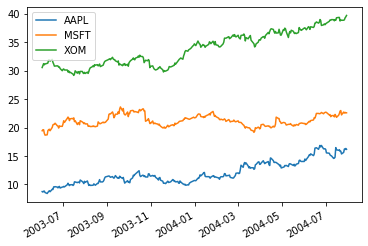

In [44]:
stocks.loc['Jun 2003' : 'July 2004'].plot() #filtering with df.loc

## 5. Resampling

In [ ]:
# Upsample or downsample

In [45]:
len(stocks.resample('1D').mean())

3208

In [46]:
# downsampling - removind rows . resample behaves a bit like a groupby
stocks.resample('1M').mean().head()

,AAPL,MSFT,XOM
2003-01-31,7.239048,20.742381,28.356190
2003-02-28,7.333684,18.786316,27.985263
2003-03-31,7.299048,19.395238,29.065238
2003-04-30,6.923810,19.871429,29.050476
2003-05-31,8.885238,19.946667,29.728571


In [49]:
stocks2 = stocks.resample('1D').mean() # resample adds e.g. weekends and other missing days
stocks2.index.weekday[:20]

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1], dtype='int64')

In [56]:
stocks.rolling(window=3).mean() # a subset of the data is treated - moving average in this case
# smoothes the data

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,7.433333,21.256667,29.473333,915.543333
2003-01-07,7.443333,21.530000,29.383333,920.176667
2003-01-08,7.386667,21.586667,29.246667,920.623333
...,...,...,...,...
2011-10-10,378.660000,26.510000,74.576667,1171.773333
2011-10-11,386.300000,26.730000,75.370000,1181.963333
2011-10-12,397.096667,26.966667,76.570000,1199.226667
2011-10-13,403.636667,27.046667,76.600000,1202.150000


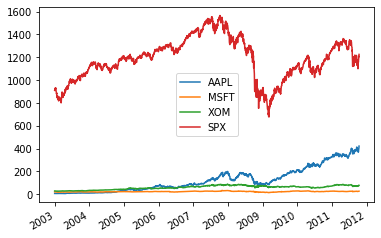

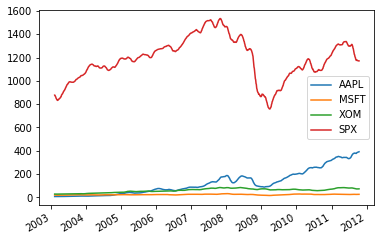

In [61]:
stocks.plot()
stocks.rolling(window=30).mean().plot()